# <ins>Most Probable Configurations, Entropy, and Temperature</ins>
## An Interactive Exercise

In this exercise, you will explore the relationships between fundamental concepts of statistical mechanics, including _multiplicity_, _most probable configurations_, _entropy_, and _temperature_. Most crucially, you will develop an intuitive understanding of the concept of _thermal equilibrium_.

Let's consider a model system consisting of binary spins, such as individual electrons or atoms with one valence electron. Each spin can be in only one of two possible states: either spin up or spin down. This model is also easily extended to binary mixtures. As we demonstrated in class, elementary probability calculations allow us to enumerate the number of possible states. 

<img src="files/kittel.jpg">
(From Kittel & Kroemer)

In [11]:
#!/usr/bin/python

import matplotlib.pyplot as plt

import multiplicity as mult

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


Consider a single system with $N = 10$ spins. What is the range of possible spin excess parameters $2 s = N_{\uparrow} - N_{\downarrow}$?

Compute each of the values of the multiplicity $\Omega (N, s) = {N! \over N_{\uparrow}! N_{\downarrow}!}$ using the method mult.multiplicity (N, s) (note that we use $\Omega$ where Kittel uses $g$). This code calculates the multiplicity using a straightforward method, directly calculating the factorials. Do your results agree with the figure from Kittel?

In [23]:
N = 10

# Complete the arguments in the loop. Be careful to pass only integers through, using the int keyword.
# Also pay careful attention to the upper bound of the loop; remember range (x, y) goes over all integers 
# from x to y - 1, where x and y must both be integers.

for s in range ( int (-N/2), int (N/2) + 1 ):
  print (mult.multiplicity (N, s))

1.0
10.0
45.0
120.0
210.0
252.0
210.0
120.0
45.0
10.0
1.0


Compute and plot the combined multiplicity $\Omega (N, s) = \sum_{s_1 = -N_1/2}^{N_1/2} \Omega_1 (N_1, s_1) \Omega_2 (N_2, s_2)$ where $s_1 + s_2 = s$, and $N_1 + N_2 = N$, using the method mult.totalmultiplicity (N1, N2, s). This code directly calculates this summation over all possible configurations consistent with the total spin excess $s$. 

The plot shows the combined mulitplicity of both systems, as a function of the ratio $s_1 / N_1$. The scalar number output is the summed total $\Omega (N, s)$. 

Let's first examine case with spin excess 0, for a relatively small system with $N_1 = 10$ spins, $N_2 = 90$ spins, and _zero_ spin excess: $s = 0$.

Maximum multiplicity at s1/N1 =  0.0 s2/N2 =  0.0  mult =  2.616451016446346e+28


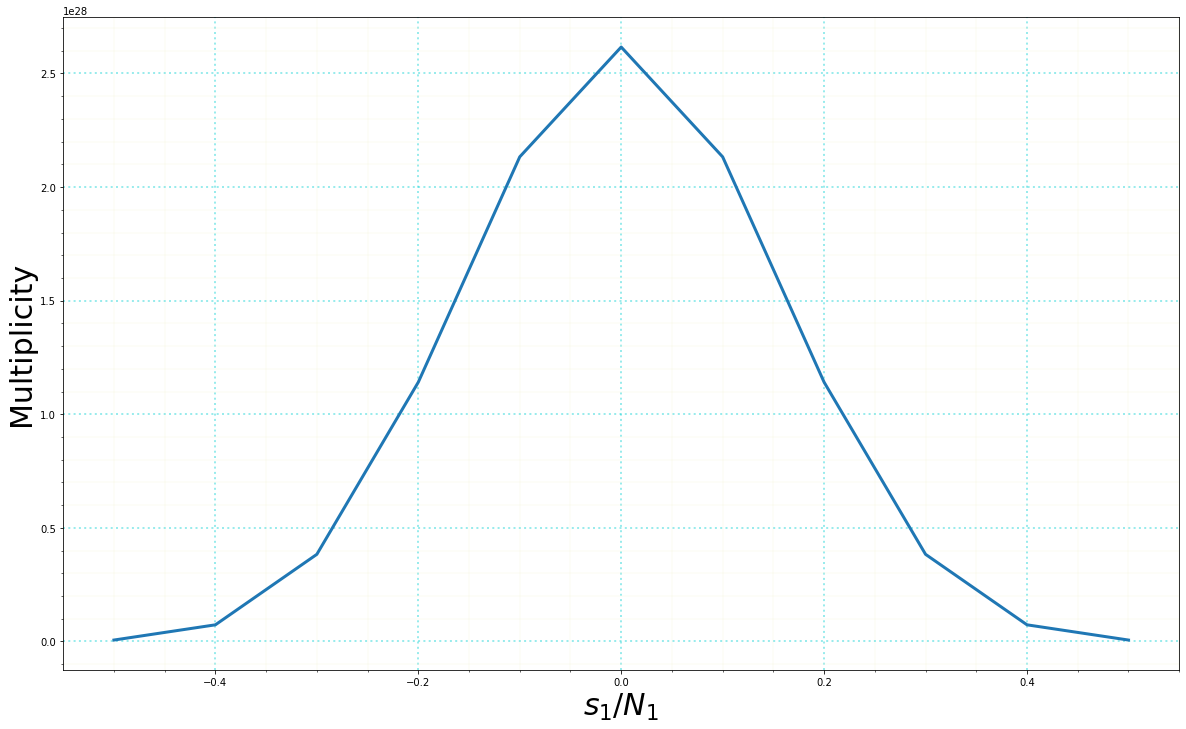

1.0089134454556422e+29

In [26]:
N1 = 10
N2 = 90
s  = 0
mult.totalmultiplicity (N1, N2, s)

Next, keeping the system size the same ($N_1 = 10$ spins, $N_2 = 90$ spins), increase the spin excess to $s = 10$. What do you find?

Next, still keeping the system size the same, increase the spin excess to $s = 20$. What happens to the most probable state? What relationship do you observe for the ratios $s_1 / N_1$ and $s_2 / N_2$ for the most probable state?

Now, increase the system size by a factor of 10, to $N_1 = 100$ spins and $N_2 = 900$ spins. Keep the ratio of spin excess to the total number of spins $s / N$, where $N = N_1 + N_2$, the same as in the previous two plots. What happens to both the most probable state, as well as the width of the multiplicity curve?

We'd like to explore what happens when we make the system even larger. But what happens when you try to increase the size of the system to $N_1 = 1000$ spins and $N_2 = 9000$ spins?

The problem stems from the direct computation of the factorial function $N!$. The factorial function very rapidly grows with increasing $N$, eventually becoming faster than exponential growth. By $N = 180$, we can no longer store the outcome as a float in Python.

In [ ]:
for N in range (0 , 190, 10):
  print (N, " N! = " + '{:.2e}'.format(math.factorial (N) ) )

## <ins>Extending the Spin Model to Large N</ins>

To handle the enormous number of states accessible to larger $N$ systems, it is convenient to consider the logarithm of the number of states. At a basic level, **the logarithm of the multiplicity times Boltzmann's constant is the entropy** :

$$\sigma = k \ln \Omega (N, s).$$

Write a method, <code>logfact</code>, which defines the natural log of $N!$ using the Stirling approximation :

$$ N!  \simeq (2 \pi N)^{1/2} (N / e)^N f (N)$$

Here $f (N)$ are the leading terms in the polynomial derived from an asymptotic series approximation ($N \gg 1$) to the $\Gamma$ function :

$$ f (N) = 1 + a / n + b / n^2 - c / n^3 - d / n^4 $$

Here the coefficients are $a = 1/12, b = 1/288, c = 139/51840, d = 571/2488320$. The function should be stored in a file, <code>stirling.py</code>, and take the form

<code> def logfact (n) : </code>

Because the Stirling approximation diverges as $N \rightarrow 0$, you'll need to treat $N = 0$ a special case. By using the Stirling approximation only when $N > 1$, we ensure that we get exact results for $N = 0$ and $N = 1$ :

<code>
if (n > 1) :
 logf = ...
  val = ... + ... + logf
else :
  val = 0

return val # return the Stirling approximation for N!
</code>

In [13]:
import stirling
import math
import matplotlib.pyplot as plt

Let's **verify** that our Stirling approximation method works by comparing it against the built-in <code>math.factorial</code> function, which is _exact_. Call the function below, <code>logfacterror</code> with several integer values and explore the magnitude of the error as n increases from $\sim$ 2 or 3 to 100. It is always a good idea to check the edge cases as well: $n = 0$ and $n = 1$.

In [14]:
def logfacterror (n):

    if (isinstance (n, int) == False):
      raise Exception ("n must be an integer.")
    
    if (n < 0):
      raise Exception ("n must be positive.")
    
    diff = stirling.logfact (n) - math.log (math.factorial (n))
    

    if (n > 1):
      val = diff /  math.log (math.factorial (n) ) 
      print ("Fractional error in Stirling approx. to log ", n, "! = ", val)
    else:
      val = diff
      print ("Difference error in Stirling approx. to log ", n, "! = ", val)
    
    return val

In [9]:
logfacterror (0); logfacterror (1); logfacterror (2); logfacterror (3)

Difference error in Stirling approx. to log  0 ! =  0.0
Difference error in Stirling approx. to log  1 ! =  0.0
Fractional error in Stirling approx. to log  2 ! =  -3.032480180710721e-05
Fractional error in Stirling approx. to log  3 ! =  -1.671555124879832e-06


-1.671555124879832e-06

Next, make a plot of the error of the Stirling approximation. We're going to make the plot on __log-log__ axes, since a power-law function $A n^{B}$ is a __straight line__ on a log-log plot. __(Question: Why?)__

By inspecting the plot, what is the power-law index $B$ by which the Stirling approximation converges? This index is called __the order of the approximation__.

Fractional error in Stirling approx. to log  2 ! =  -3.032480180710721e-05
Fractional error in Stirling approx. to log  3 ! =  -1.671555124879832e-06
Fractional error in Stirling approx. to log  4 ! =  -2.307175127177199e-07
Fractional error in Stirling approx. to log  5 ! =  -5.095579658382404e-08
Fractional error in Stirling approx. to log  6 ! =  -1.5028227052125865e-08
Fractional error in Stirling approx. to log  7 ! =  -5.3939201546555375e-09
Fractional error in Stirling approx. to log  8 ! =  -2.231667646339591e-09
Fractional error in Stirling approx. to log  9 ! =  -1.0282670742069947e-09
Fractional error in Stirling approx. to log  10 ! =  -5.154838743653289e-10
Fractional error in Stirling approx. to log  11 ! =  -2.7656624263474345e-10
Fractional error in Stirling approx. to log  12 ! =  -1.568948763278575e-10
Fractional error in Stirling approx. to log  13 ! =  -9.325695376348891e-11
Fractional error in Stirling approx. to log  14 ! =  -5.766991869892198e-11
Fractional error

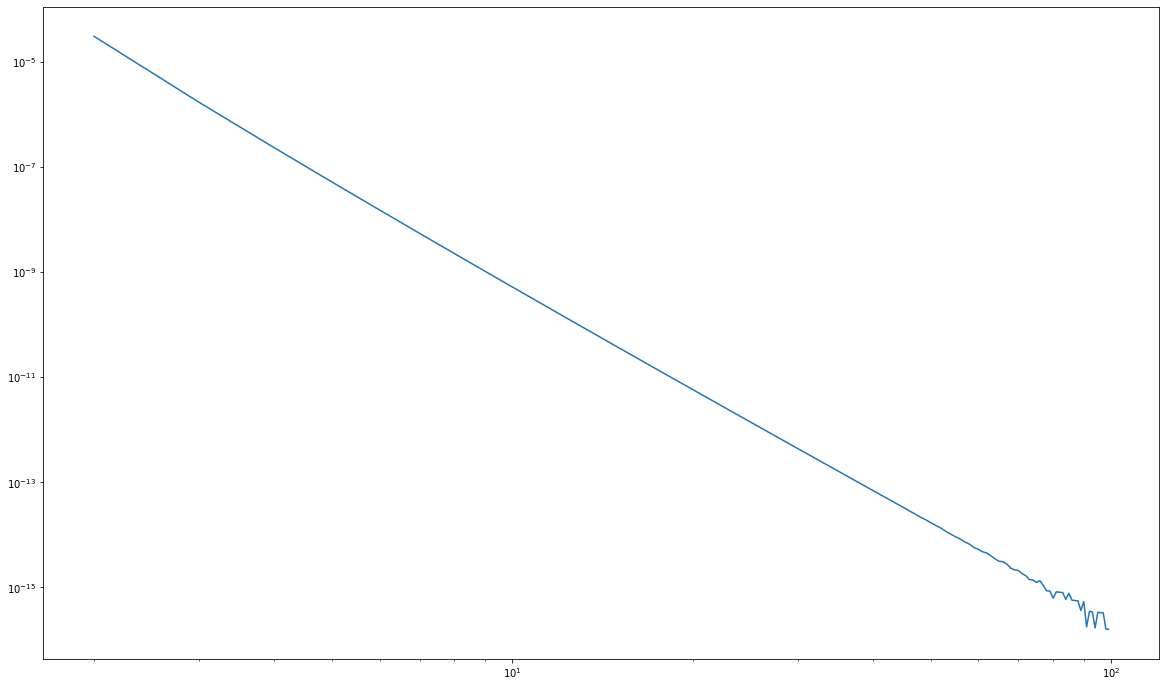

In [15]:
errorlist = []
nlist = []

for n in range (2, 100):
    val = logfacterror (n)
    errorlist.append (abs (val) ) 
    nlist.append (n)

plt.loglog (nlist, errorlist)

Now that we're sure our Stirling apprxomation formula works very well, let's get an idea of just how large the number of possible states in a macroscopic system is, by computing the entropy of an Avogadro's number ($6.022 \times 10^{23}$) of spins in our model system, with zero spin excess $s$ : 

In [12]:
mult.entropy (6.022e23, 0) 

4.174132321331955e+23

# Entropy and Irreversibility

This entropy for $N_A$ spins is a very large quantity, $4 \times 10^{23} k$, but the multiplicity of states (which, as you'll recall, is $\Omega = \exp (\sigma / k)$ ) is a truly gargantuan number, $\exp (4 \times 10^{23})$, or $\sim 10^{10^{23} }$. By way of comparison, the total number of all the stars in the entire Hubble volume of the observable universe is a _mere_ $\sim 10^{20}$, and all particles (photons, electrons, protons, neutrons) in the Hubble volume _only_ $\sim 10^{80}$. Remember that an Avogadro's number of H is just 1 gram, about the hydrogen content of a large spoonful of H$_2$O. Yet the sheer quantity of total accessible states in even a tiny macroscopic system vastly exceeds the total number of all the particles of the observable universe. 

In fact the two quantities are not even close. If you were just to write out every zero in the total number of particles in the universe -- $10^{80}$ in 12 point font, it would fit on one line on a page. The full number of accessible states for $N_A$ spins, $10^{10^{23} }$, is such a Brobdingnagian quantity that it almost defies intuition. If you were just to write out every zero in it in 12 point font, the full number would extend 100 kiloparsecs -- clear across the entire Milky Way galaxy, past the Small and Large Magellanic Clouds, and a fair fraction of the distance to the Andromeda galaxy. 

The vastness of $\Omega$ has important ramifications for the second law of thermodynamics. Consider for example a system of $N_A$ spins all set up in a regularly-ordered fashion, one up, one down, and so on. __Question: What's the multiplicity and entropy of this initial state?__

Then, let's imagine the system comes to relax thermally to an equilibrium in which the spin excess $s = 0$ still, but in which the spins are all fully random, and that we've lost track of which spins are up and down. Now what's the multplicity and entropy of the final, equilibrium state? They are just $\sigma = 4 \times 10^{23} k$, and $\Omega = \exp (4 \times 10^{23})$, or $\sim 10^{10^{23} }$. 

__Question : Since all states are equally probable, what is the probability of finding the system in its initial configuration versus the equilibrium state?__

It's about as close a value to zero as you might be able to conceive, yet it's not exactly zero. __This is the statistical basis of the Second Law of Thermodynamics__. The underlying laws of physics (either Newton's and Maxwell's laws in the classical realm, or Schrödinger's equation in the quantum regime) are fully reversible, and there is always a small extremely remote chance for the system to return to its initial state. Yet, because the probabilities involved are so fantastically small, the timescales required for the system to recur to an initial, low entropy state vastly exceed the age of the universe. The system will aways be found near the equilibrium configuration, due to the overwhelming multiplicity of the equilibrium configuration.

In [ ]:
N = 1.e23

logslist = []
entropylist = []

g0 = mult.gaussentropy (N, 0)

npts = 1000
for i in range (0, npts + 1) :
    fac = math.exp (-10 + 10 * (i / npts)  )
#    print (fac)
    entropy = mult.gaussentropy (N, fac * N) # call with spin excess = fac N
    entropylist.append (entropy)
    logslist.append (math.log (fac) ) 
 
print ("g0 = ", g0)
plt.plot (logslist, entropylist)
plt.xlabel('log $s / N$', fontsize=30)
plt.ylabel('Entropy $\sigma (N, s) - \sigma (N, 0)$', fontsize=30)
plt.grid(b=True, which='major', color='DarkTurquoise', alpha=0.4, linestyle=':', linewidth=2)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.2, linestyle='-', linewidth=2)